In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/attack_conversion.csv')
df['coef'] = (df['converted'] / df['original'] * 100).fillna(1)
display(df)

,original,converted,coef
0,0,0.0000,1.000000
1,5,0.0488,0.976000
2,10,0.0956,0.956000
3,15,0.1407,0.938000
4,20,0.1842,0.921000
5,25,0.2271,0.908400
6,30,0.2688,0.896000
7,35,0.3095,0.884286
8,40,0.3490,0.872500
9,45,0.3893,0.865111


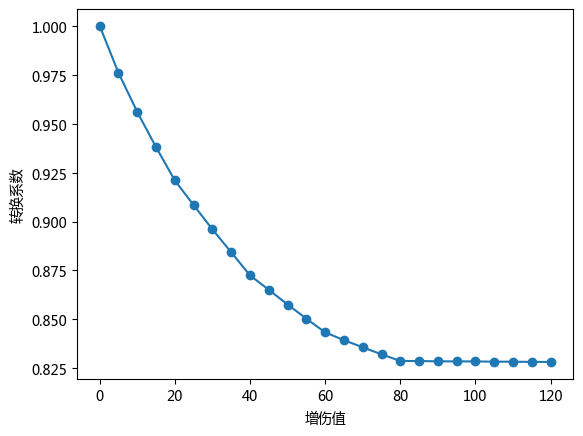

In [3]:
def viz_curve(x, y):
    fig = plt.figure()
    plt.plot(x, y, 'o-')
    plt.xlabel('增伤值')
    plt.ylabel('转换系数')


viz_curve(df['original'], df['coef'])

In [4]:
a = df[df['original'] <= 80]
b = df[df['original'] >= 80]

In [5]:
display(a)

,original,converted,coef
0,0,0.0000,1.000000
1,5,0.0488,0.976000
2,10,0.0956,0.956000
3,15,0.1407,0.938000
4,20,0.1842,0.921000
5,25,0.2271,0.908400
6,30,0.2688,0.896000
7,35,0.3095,0.884286
8,40,0.3490,0.872500
9,45,0.3893,0.865111


[ 0.19907302 39.81090018  0.80101899]


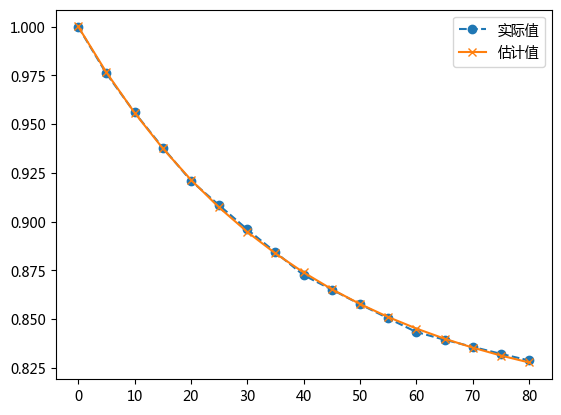

In [6]:
# 拟合指数曲线
def target_func(x, a0, a1, a2):
    return a0 * np.exp(-x / a1) + a2


def fit(x, args, func):
    return np.array([func(v, *args) for v in x])


def guess_func(x, y):
    fig = plt.figure()
    plt.plot(x, y, 'o--', label='实际值')

    para, cov = optimize.curve_fit(target_func, x, y)
    print(para)
    y_fit = fit(x, para, target_func)
    plt.plot(x, y_fit, 'x-', label='估计值')
    plt.legend()
    plt.show()


x = a['original']
y = a['coef']
guess_func(x, y)

,x,truth,pred,rel_delta
0,0,0.00,0.000000,0.000000
1,5,4.88,4.882497,0.051166
2,10,9.56,9.557602,-0.025088
3,15,14.07,14.061868,-0.057798
4,20,18.42,18.426123,0.033239
5,25,22.71,22.676307,-0.148361
6,30,26.88,26.834199,-0.170389
7,35,30.95,30.918034,-0.103282
8,40,34.90,34.943036,0.123311
9,45,38.93,38.921872,-0.020878


,x,truth,pred,rel_delta
2,10,9.56,9.557602,-0.025088
4,20,18.42,18.426123,0.033239
8,40,34.90,34.943036,0.123311
16,80,66.30,66.165365,-0.203070


Text(0.5, 1.0, '增伤值<=80时')

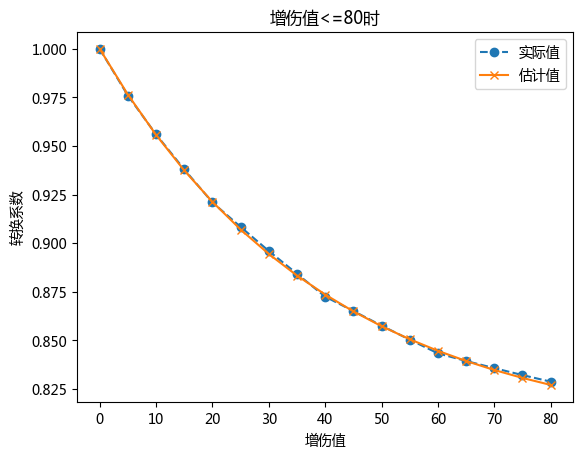

In [7]:
def viz_fit(x, y, params, func):
    y_fit = fit(x, params, func)
    diff = y_fit - y
    ratio = diff * 100 / y
    prediction = pd.DataFrame(dict(x=x, truth=y * x, pred=y_fit * x, rel_delta=ratio))
    focus = prediction[prediction['x'].isin({10, 20, 40, 80, 120})]
    display(prediction)
    display(focus)

    fig = plt.figure()
    plt.plot(x, y, 'o--', label='实际值')
    plt.plot(x, y_fit, 'x-', label='估计值')
    plt.legend()
    plt.xlabel('增伤值')
    plt.ylabel('转换系数')


params = (0.2, 40, 0.8)
viz_fit(a['original'], a['coef'], params, target_func)
plt.title("增伤值<=80时")

,original,converted,coef
16,80,0.6630,0.828750
17,85,0.7044,0.828706
18,90,0.7457,0.828556
19,95,0.7871,0.828526
20,100,0.8285,0.828500
21,105,0.8698,0.828381
22,110,0.9112,0.828364
23,115,0.9525,0.828261
24,120,0.9939,0.828250


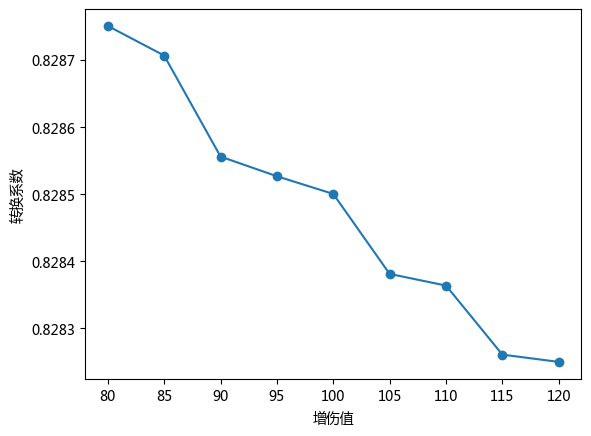

In [8]:
display(b)
viz_curve(b['original'], b['coef'])

In [9]:
def linear_fit(x, y):
    z1 = np.polyfit(x, y, 1)  #一次多项式拟合，相当于线性拟合
    p1 = np.poly1d(z1)
    return z1


params = linear_fit(b['original'], b['coef'])
print(list(params))

[np.float64(-1.2880800518433902e-05), np.float64(0.8297651036082629)]


,x,truth,pred,rel_delta
16,80,66.30,66.300000,1.339636e-14
17,85,70.44,70.438369,-2.315563e-03
18,90,74.57,74.576105,8.186625e-03
19,95,78.71,78.713208,4.075146e-03
20,100,82.85,82.849677,-3.895484e-04
21,105,86.98,86.985514,6.339276e-03
22,110,91.12,91.120717,7.873987e-04
23,115,95.25,95.255288,5.551689e-03
24,120,99.39,99.389225,-7.793319e-04


,x,truth,pred,rel_delta
16,80,66.30,66.300000,1.339636e-14
24,120,99.39,99.389225,-7.793319e-04


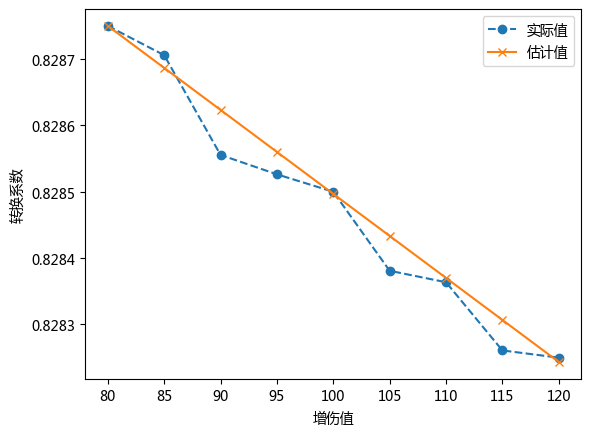

In [10]:
# k = -1.288e-05
k = -0.82875 / (65535 - 80)
# h = 0.829765
h = -65535 * k
viz_fit(b['original'], b['coef'], (k, h), lambda x, k, b: k * x + b)

In [11]:
print((-params[1]) / params[0])

64418.75273363437


In [12]:
(1 << 16)

65536